In [26]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import pickle
import json
import numpy as np

## Read Embeddings
We read in the embeddings files, as well as the original labels file.

In [9]:
best_embeddings = np.load("best_embeddings.npy")
full_embeddings = np.load("full_embeddings.npy")
full_labels = np.array(pickle.load(open("3_24_100_labels.pickle","rb")))

In [12]:
# Create a PCA object so we can visualize embeddings.
pca_obj = PCA()

## Train/Test Split
Perform a train/test split with known indices using the previously defined indices file.

In [17]:
# Split data based on existing indices.
def split_data_existing(arrays, labels, indices):
    split_arrs = []

    # Build labels first
    train_labels = []
    test_labels = []
    for lbl in np.unique(labels):
        train_labels.append(labels[indices[lbl][0]])
        test_labels.append(labels[indices[lbl][1]])
    train_labels = np.concatenate(train_labels)
    test_labels = np.concatenate(test_labels)
    for arr in arrays:
        train_data = []
        test_data = []
        for lbl in np.unique(labels):
            train_data.append(arr[indices[lbl][0]])
            test_data.append(arr[indices[lbl][1]])
        train_data = np.concatenate(train_data)
        test_data = np.concatenate(test_data)

        split_arrs.append([train_data, test_data])
    return split_arrs, train_labels, test_labels

In [18]:
indices = json.load(open("60_40_indices.txt","r"))

In [19]:
[[train_best_embeddings,test_best_embeddings]],train_labels,test_labels = split_data_existing([best_embeddings],full_labels,indices)

## View Embeddings with PCA

In [13]:
pca_best_embeddings = pca_obj.fit_transform(best_embeddings)

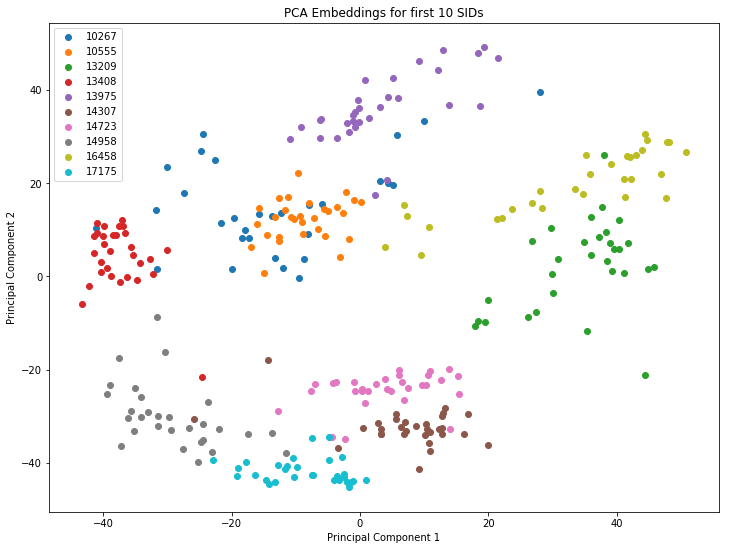

In [22]:
plt.figure(figsize=(12,9))
plt.title("PCA Embeddings for first 10 SIDs")
f10 = np.unique(full_labels)[:10]
for lbl in f10:
    plt.scatter(pca_best_embeddings[full_labels == lbl,0],pca_best_embeddings[full_labels == lbl,1],label=lbl)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

## KNN Classification
Perform KNN Classification using the known train/test split.

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(train_best_embeddings,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
test_best_preds = knn.predict(test_best_embeddings)

In [27]:
print(classification_report(test_labels,test_best_preds))

              precision    recall  f1-score   support

       10267       0.78      0.58      0.67        12
       10555       0.67      1.00      0.80        12
       13209       0.91      0.83      0.87        12
       13408       0.83      0.83      0.83        12
       13975       1.00      0.83      0.91        12
       14307       0.91      0.83      0.87        12
       14723       1.00      0.92      0.96        12
       14958       0.83      0.91      0.87        11
       16458       0.67      1.00      0.80        12
       17175       0.92      1.00      0.96        12
       17839       0.88      0.64      0.74        11
       24281       0.85      0.92      0.88        12
       24761       0.76      1.00      0.87        13
       27424       0.82      0.75      0.78        12
       28584       0.80      1.00      0.89        12
       28589       0.90      0.75      0.82        12
       29887       0.92      1.00      0.96        12
       30171       0.83    